In [1]:
#Importing packets for calculations and plotting
import numpy as np
import random
from random import randint
import matplotlib.pyplot as plt

# Task1: Calculating Espin, mue, cv

## Generate random lattice

I create the simplest model of a magnetic material
for a two-dimensional lattice of spins. 
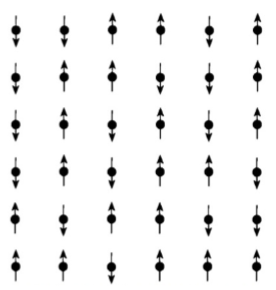
By generating a NxN matrix of randomly generated up and down flips(+1,-1)

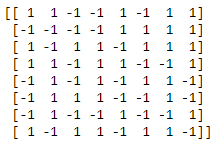










# Monte Carlo Simulation

## Step 1

I will use this randomly generated array of +1 and -1 orientations for the Monte_Carlo Simulation.

For one step of the Monte Carlo Simulation, the code will use this equation


To calculate the Eflip Energy I multiply the randomly chosen flip by 2 and multiply it by the sum of the 4 neighbour flips(left, right, up, down).


For example if the randomly chosen flip is at postition(1,1)
The equation would be Eflip=2xSpin(1,1)x(Spin(Down)+Spin(Up)+Spin(Left)+Spin(Right)) = 2xSpin(1,1)x[Spin(0,1)+Spin(2,1)+Spin(1,0)+Spin(1,2)]


However: on the outline of the matrix, there aren't any neighbours in some places. For example at position(0,0), there is no *left* and *up* neighbour. In order to include these neighbours, I used periodic boundary conditions at the edges of the lattice to ensure they have four neighbours.


For example for position (0,0). my left and up neighbour will be at N-1 of the matrix.

Therefore the equation for position (0,0) to find Eflip would be:
                  
Eflip=2xSpin(0,0)x[Spin(0,N-1)+Spin(0,1)+Spin(1,0)+Spin(N-1,0)]

## Step 2
### If Eflip<=0

After having included the Boundary conditions it's time to do the second step for one step of the Monte Carlo Simulation.

If Eflip<= 0, the flip in that positions will be flipped(-1->1 or 1->-1)

### If Eflip>0

If Eflip>0, then we only flip it's position when the value is greater than a random number generated between 0 and 1. This is to account for any random thermal fluctuations that spontaneously flip spins


This is one step of the Monte-Carlo. For a complete Monte_Carlo simulation, step 1 and step 2 needs to be repeated N^2 amount of times


# Equillibrium

I need to first equalise using the Monte Carlo simulation on the randomly created matrix for spins by running the simulation 50 times.

Using the matrix that has been generated, I run the actual simulation by running the Monte-Carlo simulation 250 times using the last generated matrix of the equilibrium stage as the base.


# Calculating Etotal

Etotal of a NxN matrix of flips will be equal to -J time the sum of every position multiplies by it's 4 neighbours but don't include any interaction that has already previously happend.

For example when calculating Etotal for position (1,1) the equation will be:

Etot = -jxSpin(1,1)x(Spin(1,0)+Spin(1,2)+Spin(0,1)+Spin(2,1))

If I then calculate the Etotal value for position (1,2), then I can't include the interaction with position (1,1) as it has already been one when calculating Etotal for position (1,1)

Therefore the equation of Etotal for position (1,2) will be:

Etot = -jxSpin(1,2)x(0+Spin(1,3)+Spin(0,1)+Spin(2,1))

where 0 is the interaction with spin(1,1)


So I use the calculation for every matrix that has beeen generated by the monte-carle simulation during the 250 steps and save the Etotal for every matrix in an array.

# Calculating Espin

The equation for the average energy per spin is
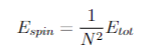

To calculate this we divide the sum of the Etotal divided by the 250 steps with N^2

# Calculating mue

The equation for the average magnetisation per spin is
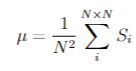

To calculate this we sum up all the positions in the matrix for all the 250 steps, then divide it by the 250 steps and divide it again with N^2

# Calculating cv

The equation for the average specific heat of the system

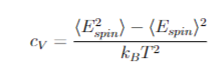

## For <E^2Spin>

To caclulate this we square the matrix for all the Espin values previously calculated, then sum them up, and then divide it with the 250 steps.



## For <ESpin^2>

We take the value previously cacluated for Espin and then square it and then divide it by the 250 steps.

## Cv

Using the values we got for the average E^2Spin and the average Espin^2 we plug that into the equation so (<E^2Spin> - <Espin^2>)/(KbxT^2))

Where kb=1 and T is the temperature used for the system

In [2]:
#Constants
N=8
T1=1
T2=5
m_eq=50
m_run=250
kb=1
J=1
Etot=0
Eflip_tot = 0

#Function for creating a NxN matrix of random -1 & 1
def Flip(N):
    x = [-1,1]
    return [[x[randint(0,1)]  for i in range(N)] for j in range(N)]

#Function for running Monte-carlo
def Matrix(N,T,run, Flip_Matrix):
    #Blank lists or blank variables
    Matrix_sum_list=[]
    Delta=[]
    flip_sum=0
    E_total=0
    E_total_list=[]
    #run the loop by the amount of steps
    for i in range(run):
        #Run the loop for N^2 amount of time
        for k in range(N**2):     
            i=randint(0,N-1)    #random row element
            j=randint(0,N-1)    #random column element

        #Set periodic boundary conditions
            if i==0:
                if j == 0:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[N-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][N-1]+Flip_Matrix[i][j+1])
             
                elif j == (N-1):
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[N-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][0])
                
                else:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[N-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][j+1])
              
            elif j==0:
                if i == 0:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[N-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][N-1]+Flip_Matrix[i][j+1])
                 
                elif i == (N-1):
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[0][j]+Flip_Matrix[i][N-1]+Flip_Matrix[i][j+1])
               
                else:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][N-1]+Flip_Matrix[i][j+1])
           
            elif i==(N-1):
                if j == 0:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[0][j]+Flip_Matrix[i][N-1]+Flip_Matrix[i][j+1])
               
                elif j == (N-1):
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[0][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][0])
                   
                else:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[0][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][j+1])
                   
            elif j==(N-1):
                if i == 0:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[N-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][0])
        
                elif i == (N-1):
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[0][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][0])
                   
                else:
                    Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][0])
         
            else:
                Eflip=2*Flip_Matrix[i][j]*(Flip_Matrix[i-1][j]+Flip_Matrix[i+1][j]+Flip_Matrix[i][j-1]+Flip_Matrix[i][j+1])
                
            #Calculations to figure out to flip the position or not
            if Eflip<=0:
                Flip_Matrix[i][j]=-Flip_Matrix[i][j]    
            else:
                if np.exp(-Eflip/T)>random.random():
                    Flip_Matrix[i][j]=-Flip_Matrix[i][j]
                else:
                    pass  
         
        #Sum up the matrix created
        flip_sum=np.sum(Flip_Matrix)
        #Add the matrix from the Monte-Carlo simulation to a list
        Matrix_sum_list.append(flip_sum)
        
        #Calculating the total energy of all matrices in the run
        #Saves the matrix to a new matrix
        Delta=np.array(Flip_Matrix)
        #Reset the varaible
        E_total_matrix=0
        for m in range(N):
            for n in range(N):
                #Set periodic boundary conditions
                m_positive, m_negative, n_positive, n_negative=m+1,m-1,n+1,n-1
                if m_positive > N-1:
                    m_positive-=N        

                if m_negative < 0:
                    m_negative+=N

                if n_positive > N-1:
                    n_positive-=N

                if n_negative < 0:
                    n_negative+=N
                    
                #calculate the energy for that position
                Energy=Delta[m][n]*(Delta[m_negative][n]+Delta[m_positive][n]+Delta[m][n_negative]+Delta[m][n_positive])
                #Set the position to 0 to stop multiple interactions
                Delta[m][n]=0
                #Create a matrix of the total energy
                E_total_matrix=E_total_matrix+Energy
                
        #Add the matrices of the total energy
        E_total_list.append(E_total_matrix)
        
    #Sum of the matrices, temperature, run, last matrix, Etotal in an array
    return(Matrix_sum_list, T, run, Flip_Matrix,  E_total_list)

#50 equilibrium loop for T=1
All_matrix_list_i, T_i, run_i, Flip_Matrix_i, E_total_list_i = Matrix(N,T1,m_eq, Flip(N))

#250 actual steps loop for T=1
All_matrix_list_f, T_f, run_f, Flip_Matrix_f,  E_total_list_f = Matrix(N,T1,m_run, Flip_Matrix_i)

#50 equilibrium loop for T=5
All_matrix_list_j, T_i, run_j, Flip_Matrix_j, E_total_list_j = Matrix(N,T2,m_eq, Flip(N))

#250 actual steps loop for T=5
All_matrix_list_g, T_g, run_g, Flip_Matrix_g, E_total_list_g = Matrix(N,T2,m_run, Flip_Matrix_j)

#Function to calculate <Espin>,<mue> & <cv>
def values(N, T, All_matrix_list_, run_, E_total_list_):    
    #Calculates Etotal for all matrices in the steps
    Etotal=-J*np.array(E_total_list_)
    
    #Calculate the Espin for all values in the matrix
    Espin_all=1/(N**2)*Etotal
    
    #Calculate the average Espin
    Espin=sum(Espin_all)/run_
    
    #calculate average Mue value
    Average_matrix_sum=sum(All_matrix_list_)/run_
    u=abs(1/(N**2)*Average_matrix_sum)
   
    #calculate the average cv value
    cv=(sum(Espin_all**2)/run_-Espin**2)/(kb*T**2)
    
    #Returns the total energy,<Espin>,<mue> & <cv> 
    return(np.sum(Etotal),Espin,u,cv)

#Values for T=1
Etotal_T1, Espin_T1, u_T1, cv_T1=values(N, T1, All_matrix_list_f, run_f, E_total_list_f)
print('Temperature=',str(T1))
print("Etotal=", str(Etotal_T1))
print('The sum for the', str(run_f), 'matrices =',sum(All_matrix_list_f))
print('the average matrix value =',sum(All_matrix_list_f)/run_f)
print("Espin=", str(Espin_T1))    
print("mue=", str(u_T1))   
print("cv=", str(cv_T1),'\n')    
#Values for T=5
Etotal_T2, Espin_T2, u_T2, cv_T2=values(N, T2, All_matrix_list_g, run_g, E_total_list_g)
print("Etotal=", str(Etotal_T2))
print('Temperature=',str(T2))
print('The sum for the', str(run_g), 'matrices =',sum(All_matrix_list_g))
print('the average matrix value =',sum(All_matrix_list_g)/run_g)
print("Espin=", str(Espin_T2))    
print("mue=", str(u_T2))   
print("cv=", str(cv_T2),'\n') 


Temperature= 1
Etotal= -31904
The sum for the 250 matrices = 15976
the average matrix value = 63.904
Espin= -1.994
mue= 0.9985
cv= 0.0007139999999998814 

Etotal= -6840
Temperature= 5
The sum for the 250 matrices = 646
the average matrix value = 2.584
Espin= -0.4275
mue= 0.040375
cv= 0.001816000000000001 



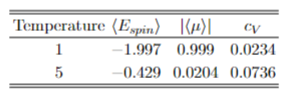


# For T=1

As shown above for T=1 the value for Espin and mue are approximately corresponding to the table,  which shows that the calculations before tc=2.269 from the equation
    
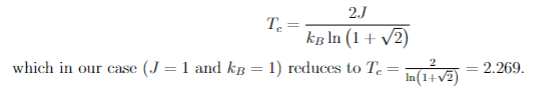

Only the cv value is not corresponding to the table. I'm not sure why this is the case as shown in the "calculating cv" heading the calculations for the code should be correct (in theory)

# For T=5

For T=5, the value for Espin and mue are sometimes approximately corresponding to the table. This is due the temperature being above the critical temperature and therefore not giving a constant approximation for the values.
   

Even the cv for t=5 is nowhere close to the value in table 1. Again, in theory, the calculations that have been used in the code should be corrrect as Espin is most definetly correct due to giving a good approx value in t=1 and E^2spin should be correct as well, dure to the the way it has been calculated.

# Task 2: Graphing Temperature range for T=1 to T=5 for Espin, Mue, cv


The temperature values for N will be arranged from 1 to 5 for 20 values

I'll be creating graphs using the previous functions created for task 1 and use a for loop to run those functions for every T value that we have.

I'll create a list to add all the Espin, Mue, cv from the range od T values

In [3]:
#range values for temperature from 1 to 5
TL=np.linspace(1,5,20)

N=8
#function to define the values for <Espin>,<mue> & <cv> for t=1 to t=5
def All_values(T,N):
    #Empty lists
    Espin_List=[]
    u_list=[]
    cv_list=[]
    for z in range (len(T)):
        #50 loop for TL
        All_matrix_list_50, T_50, run_50, Flip_Matrix_50, E_total_list_50 = Matrix(N,T[z],m_eq, Flip(N))
        #250 loop for TL
        All_matrix_list_250, T_250, run_250, Flip_Matrix_250, E_total_list_250 = Matrix(N,T[z],m_run, Flip_Matrix_50)

        #Values for TL
        Etotal_250, Espin_250, u_250, cv_250=values(N, T[z], All_matrix_list_250, run_250, E_total_list_250)
        #Add values in corresponding list for <Espin>,<mue> & <cv>
        Espin_List.append(Espin_250)
        u_list.append(u_250)
        cv_list.append(cv_250)
    #Return temperature and lists of <Espin>,<mue> & <cv>
    return(T,Espin_List,u_list, cv_list)

#Saves the values to variables
T_total, ESpin_List_total,u_list_total,cv_list_total =  All_values(TL,N)

I'll create graphs for approx 20 values inbetween T=1 and T=5 by using a function

It will plot 3 graphs for Temperature vs Espin, Mue & cv

It will also add a vertical line for the critical temperature and labels for the axis and lines

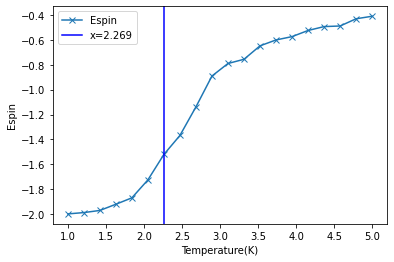

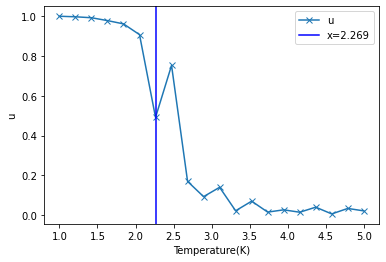

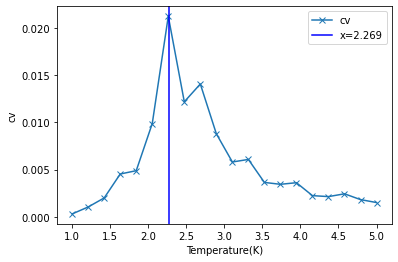

In [4]:
#Function to graph Temperature range to the lists of <Espin>,<mue> & <cv>
def graph(T_total, ESpin_List_total, u_list_total, cv_list_total):
    #plots temperature vs <Espin>
    plt.plot(T_total, ESpin_List_total, label = 'Espin',marker='x')
    #label axis
    plt.xlabel('Temperature(K)')
    plt.ylabel('Espin')
    #Critical temperature line
    plt.axvline(x = 2.269, color = 'b', label = 'x=2.269')   
    #shows legend
    plt.legend()
    #Shows plot
    plt.show()
    
    #plots temperature vs <mue>
    plt.plot(T_total,u_list_total,label = 'u',marker='x')
     #label axis
    plt.xlabel('Temperature(K)')
    plt.ylabel('u')
    #Critical temperature line
    plt.axvline(x = 2.269, color = 'b', label = 'x=2.269')
    #shows legend
    plt.legend()
    #Shows plot
    plt.show()
    
    #plots temperature vs <cv>
    plt.plot(T_total,cv_list_total,label = 'cv',marker='x')
    #label axis
    plt.xlabel('Temperature(K)')
    plt.ylabel('cv')
    #Critical temperature line
    plt.axvline(x = 2.269, color = 'b', label = 'x=2.269')

    #shows legend
    plt.legend()
    #Shows plot
    plt.show()
#return values for total temperature, total <Espin>,total <mue> & total <cv>
graph(T_total, ESpin_List_total, u_list_total, cv_list_total)

After running the code multiple times. The range where mue and c drops heavily is inbetween T=2.0 to T=2.5.

Since the critical temperature is 2.269, we can prove using the graph that the Onsager's model is correctly predicting the critical temperature for a square spin system with no external magnetic field according to the code used.

Also, eventhough cv isn't corresponding to the table. The relationship between the cv values for different temperature is still giving me a drop between range between 2 to 2.5 for temperature.

From this I can conclude that the calculation process for the cv values must be correct but the values for E^2spin might not be correct???

# Task 3: Graphing Temperature range for T=1 to T=5 for Espin, Mue, cv for a range of N values from N=5 to N=20


I create a list for all N values from 5  to 20

Using a function I will show 3 graphs for every N values using a loop using the functions from task 2

For N= 5


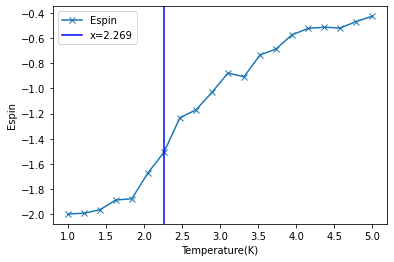

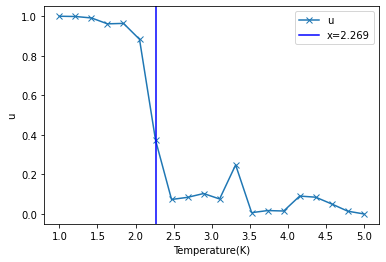

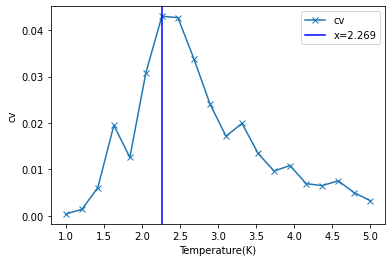

For N= 6


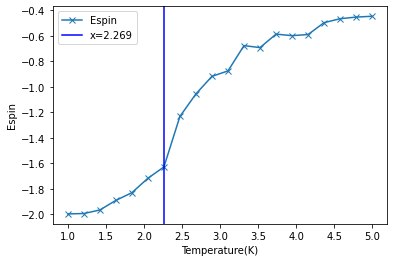

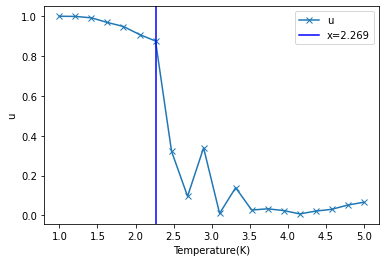

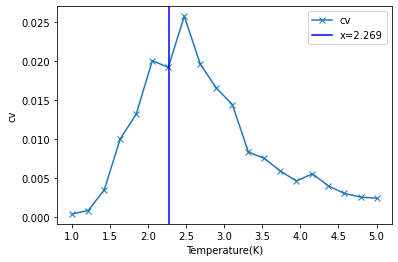

For N= 7


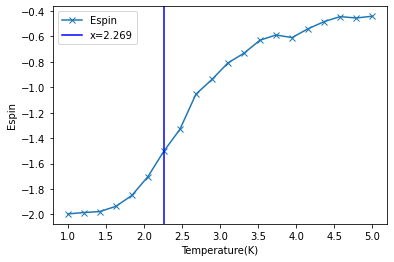

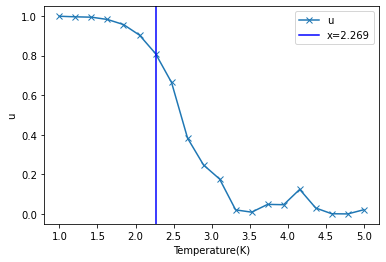

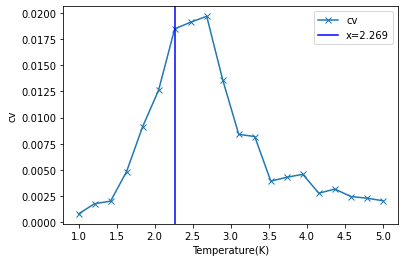

For N= 8


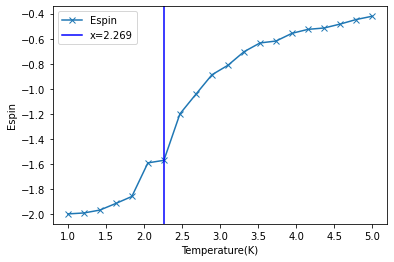

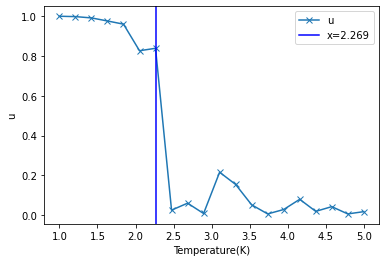

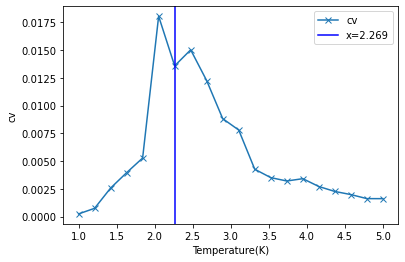

For N= 9


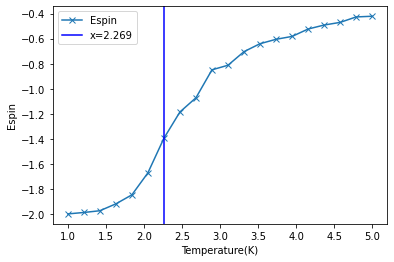

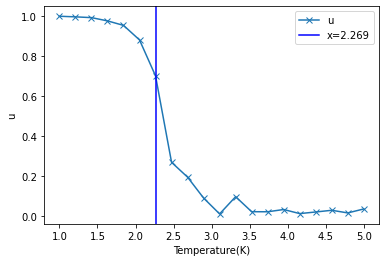

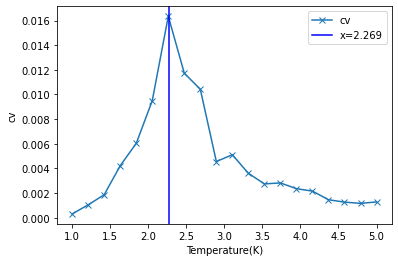

For N= 10


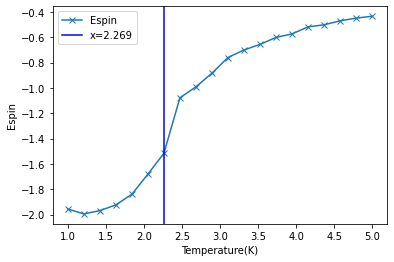

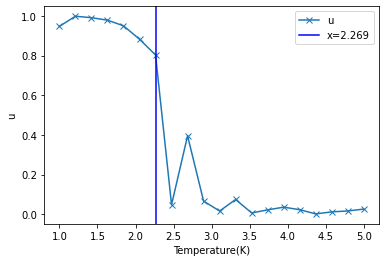

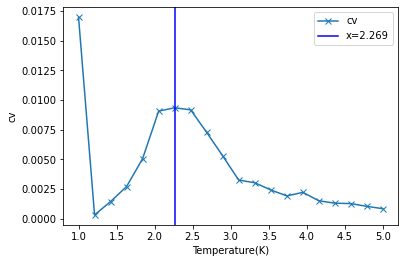

For N= 11


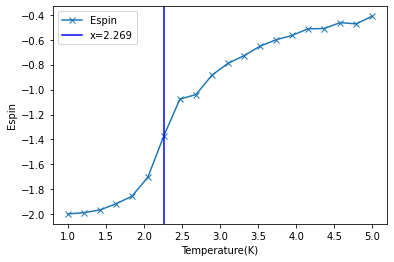

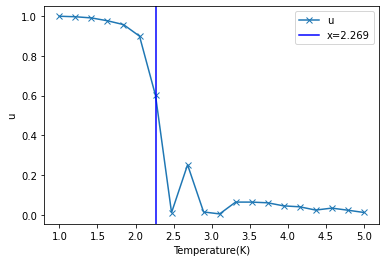

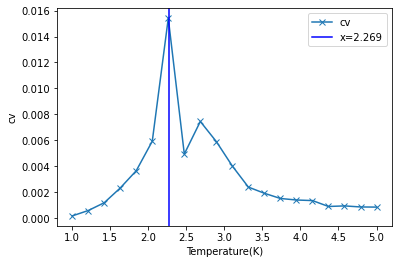

For N= 12


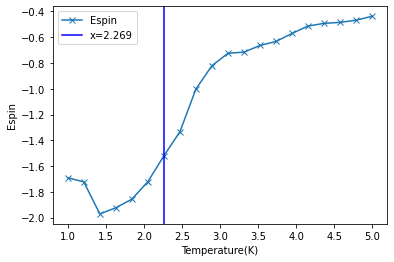

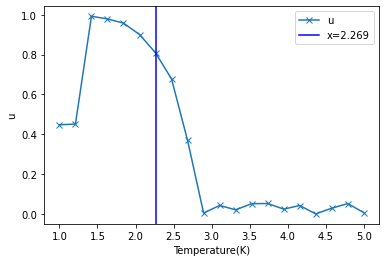

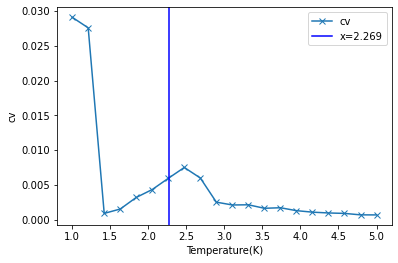

For N= 13


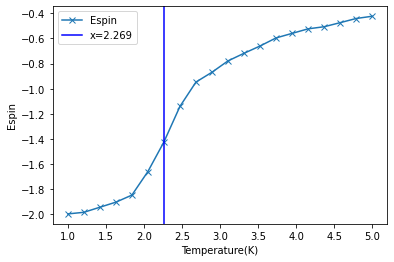

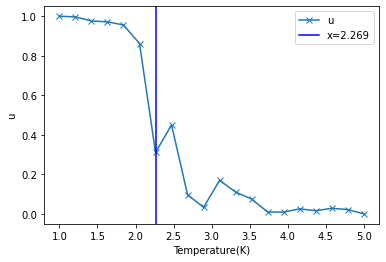

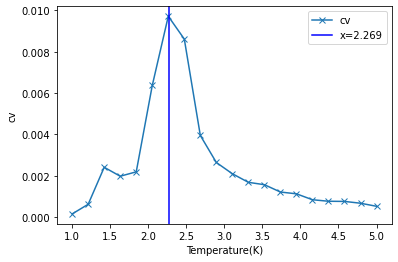

For N= 14


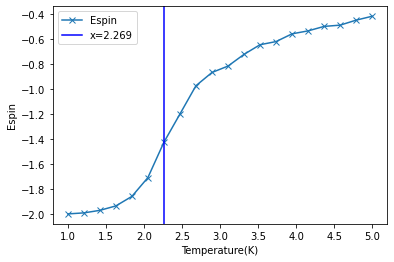

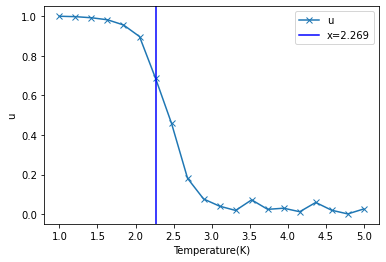

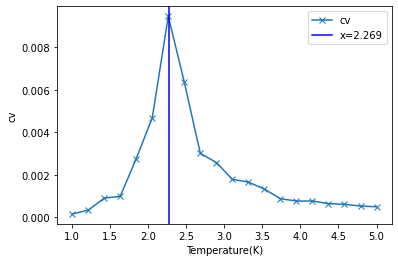

For N= 15


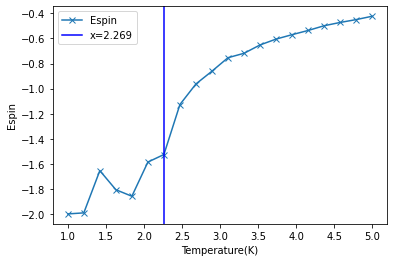

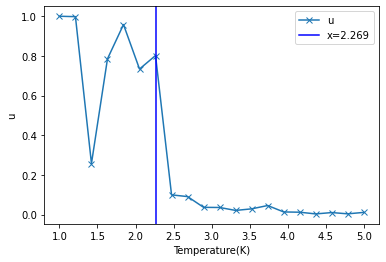

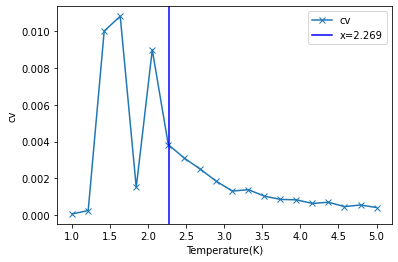

For N= 16


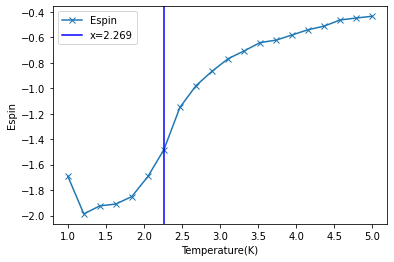

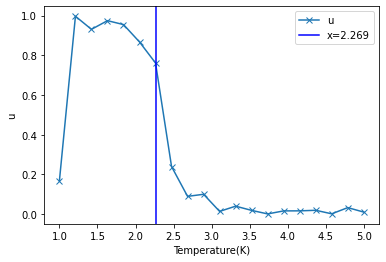

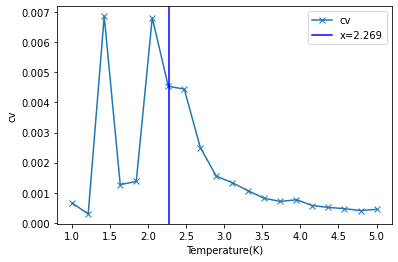

For N= 17


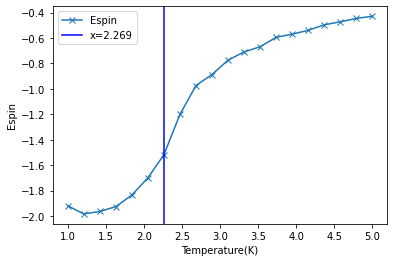

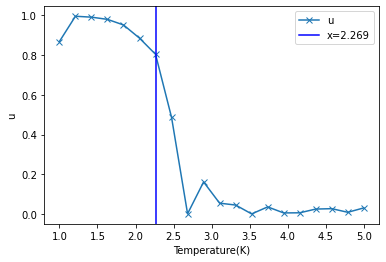

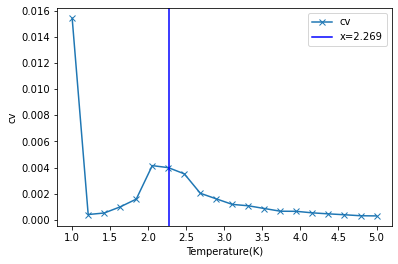

For N= 18


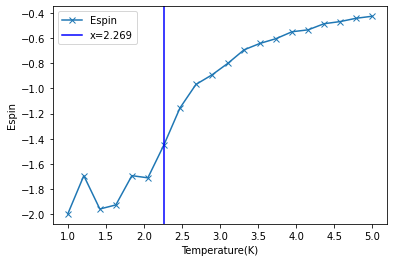

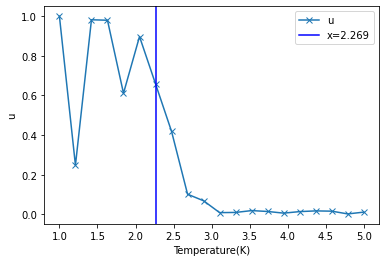

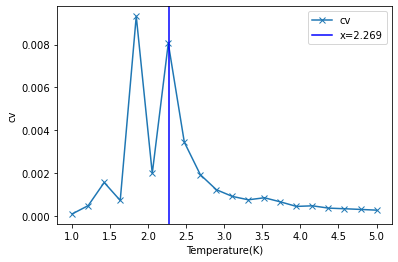

For N= 19


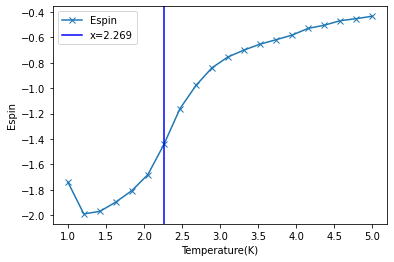

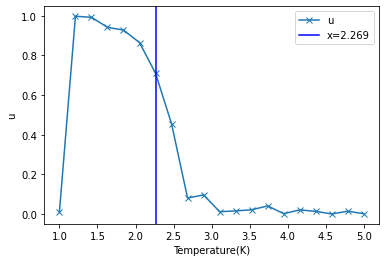

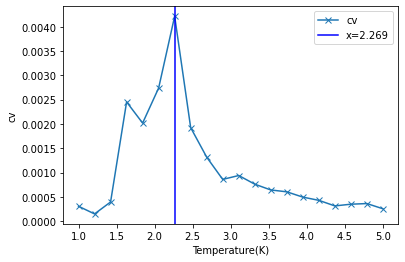

For N= 20


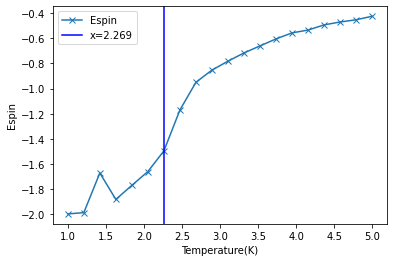

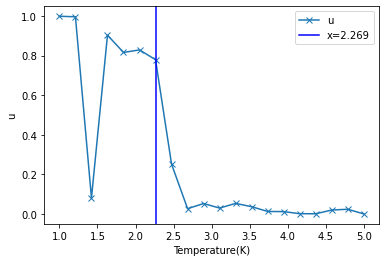

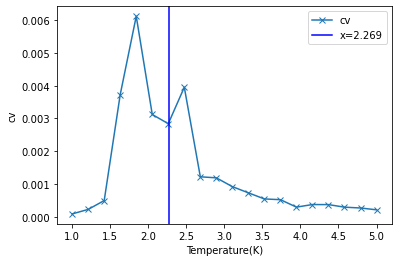

In [5]:
N_total=np.arange(5,21,1)
#print(N_total)
def All_Nvalues(T,N_total):
    for total in range(len(N_total)):
        print('For N=',str(N_total[total]))
        T_total, ESpin_List_total,u_list_total,cv_list_total =  All_values(T,N_total[total])
        graph(T_total, ESpin_List_total, u_list_total, cv_list_total)
        
All_Nvalues(TL,N_total)        


For graphs that are greater than N=12, there will be higher peaks for cv values before the critical temperature rather than one big peak around t=2 to t=2.5

A reason for this is that the code needs more time to equilibriate the flip matrix to use it as there are now more positions in the matrix.
So we can conlude that we can increase the equilibrum part corresponding to the N value

In the graph I can see that N=5 and N=6 isn't showing a curvy decline in mue before the critical temperature or the cv value isn't rising properly, but rather decline a bit and then rise again

For this to be optimal, the smallest lattice size would be the best option as it will compute faster.